In [144]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pathlib
import os

In [145]:
import kagglehub

# Download latest version
path = "D:\web dev backup\pyTensorflow\dataset\potato\Potato"

print("Path to dataset files:", path)

Path to dataset files: D:\web dev backup\pyTensorflow\dataset\potato\Potato


In [146]:
dataset_dir = pathlib.Path(path)
dataset_dir

WindowsPath('D:/web dev backup/pyTensorflow/dataset/potato/Potato')

In [147]:
IMAGE_SIZE = 256
BATCH_SIZE=32

In [148]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1500 files belonging to 3 classes.


In [149]:
train_dataset_dir = os.path.join(dataset_dir, 'Train')
test_dataset_dir = os.path.join(dataset_dir, 'Test')
validate_dataset_dir = os.path.join(dataset_dir, 'Valid')

In [150]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

validate_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validate_dataset_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [153]:
class_names = test_dataset.class_names
class_names
# class_names = train_dataset_dir.class_names
# print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 0 1 2 0 0 1 1 1 1 0 1 1 1 1 1 1 2 2 1 0 1 1 0 0 2 2 1 1 1 1 1]


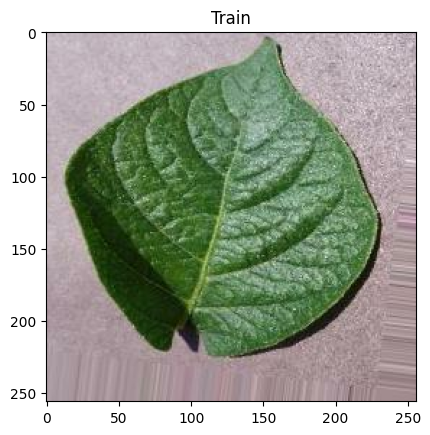

In [111]:
for image_batch, labels_batch in dataset.take(1):
    #the dataset_Train_dir.take(1) will givw us the first batch of images whose size si 32
    #image batch contains image array of 32 images.....and label batch contains labels of it....
    print(image_batch.shape)

    print(labels_batch.numpy())

    plt.imshow(image_batch[0].numpy().astype("uint8")) # we need to convert it to int bzz they are in float....
    plt.title(class_names[labels_batch[0]])

    #since we have shuffled=true we will get different image everytime

(32, 256, 256, 3)
[1 2 2 1 0 1 1 2 2 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 0 1 1 1 1 0 1 2]


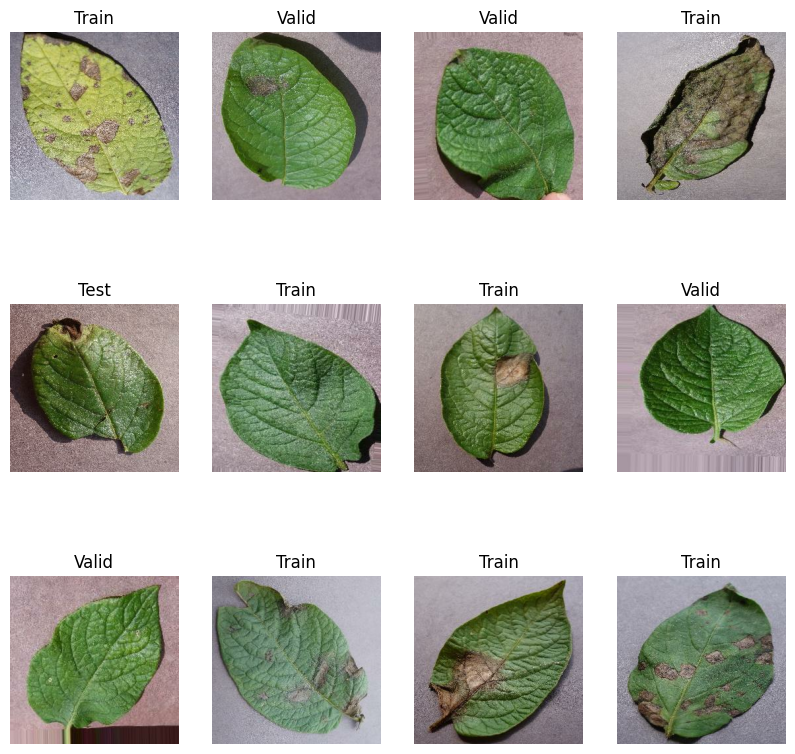

In [112]:
for image_batch, labels_batch in dataset.take(1):
    #the dataset_Train_dir.take(1) will givw us the first batch of images whose size si 32
    #image batch contains image array of 32 images.....and label batch contains labels of it....
    print(image_batch.shape)

    print(labels_batch.numpy())

    plt.figure(figsize=(10, 10))
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")



In [113]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validate_dataset = validate_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#.cache will cache the image for future use
# .prefetch will load load the images beforehand , where buffer size is decided by the computer itseflf using tf.data.AUTOTUNE


In [114]:
CHANNELS=3
EPOCHS = 10

In [116]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, interpolation='bilinear'), # Changed this line
    layers.Rescaling(1.0/255)
])

In [117]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [118]:

Input_shape = (BATCH_SIZE,IMAGE_SIZE ,IMAGE_SIZE,CHANNELS)

model  =  models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu',input_shape=Input_shape),
    #input shape requre atleat 4 params and they are (BATCH_SIZE,IMAGE_SIZE ,IMAGE_SIZE,CHANNELS) i.e 32,256,256,3
    layers.MaxPooling2D((2,2)), # in the 2x2 area it will reduce the size of image by choosing the maximum valye among this 2x2 i.e 4 values
    # just watch a lec about what it really does.....

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # layers.Conv2D(256, (3,3), activation='relu'),
    # layers.MaxPooling2D((2,2)),  no need since something was 0 dk what it was

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax'), # bcz there are total 3 number of classes


])

model.build(input_shape=Input_shape)

d:\web dev backup\pyTensorflow\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 60, 60, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 30, 30, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 115200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 128)              │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (32, 8)                │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (32, 3)                │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,603 (56.65 MB)

 Trainable params: 14,849,603 (56.65 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [121]:
history = model.fit(
    train_dataset ,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = validate_dataset
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 580ms/step - accuracy: 0.3563 - loss: 1.2284 - val_accuracy: 0.4333 - val_loss: 0.9105
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 560ms/step - accuracy: 0.6935 - loss: 0.6385 - val_accuracy: 0.7133 - val_loss: 0.5172
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 554ms/step - accuracy: 0.8392 - loss: 0.3480 - val_accuracy: 0.8633 - val_loss: 0.3042
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 559ms/step - accuracy: 0.9120 - loss: 0.2392 - val_accuracy: 0.9067 - val_loss: 0.2262
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 554ms/step - accuracy: 0.9315 - loss: 0.1993 - val_accuracy: 0.9433 - val_loss: 0.1449
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 556ms/step - accuracy: 0.9530 - loss: 0.1489 - val_accuracy: 0.8767 - val_loss: 0.3826
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 551ms/step - accuracy: 0.9244 - loss: 0.2017 - val_accuracy: 0.8000 - val_loss: 0.5116
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 554ms/step - accuracy: 0.8500 - loss: 0.3502 - val_accu

In [122]:
scores = model.evaluate(test_dataset)
scores

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.9694 - loss: 0.1182


[0.10333775728940964, 0.9766666889190674]

In [123]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [124]:
# so for each keys it ran in a loop of 10....for each image
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

Text(0.5, 1.0, 'Training and validation accuracy')

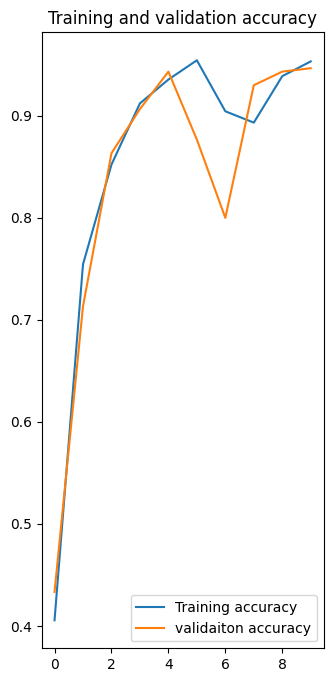

In [126]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validaiton accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

first image to predict
actual label :  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
[5.7154539e-06 7.1315332e-03 9.9286276e-01]
predicted label is : Potato___healthy


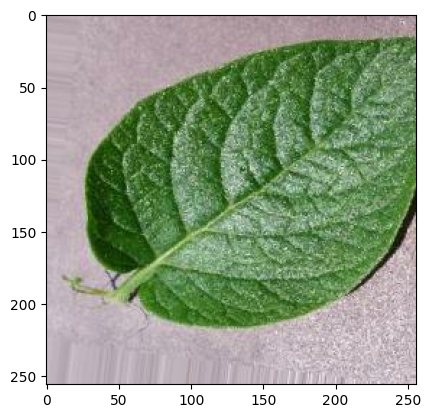

In [159]:
import numpy as np
for image_batch,labels_batch in test_dataset.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("actual label : " , class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])
    
    print(f"predicted label is : {class_names[np.argmax(batch_prediction[0])]}")

first image to predict
actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
[9.9979717e-01 2.0282192e-04 1.4647559e-11]
predicted label is : Potato___Early_blight
first image to predict
actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
[9.7724700e-01 2.2753008e-02 4.9444255e-12]
predicted label is : Potato___Early_blight
first image to predict
actual label :  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
[7.8274934e-05 7.8469321e-02 9.2145234e-01]
predicted label is : Potato___healthy
first image to predict
actual label :  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
[4.804184e-07 4.082110e-03 9.959174e-01]
predicted label is : Potato___healthy
first image to predict
actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
[8.5756049e-04 9.9914229e-01 1.2257195e-07]
predicted label is : Potato___Late_blight
first image to predict
actual label :  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/

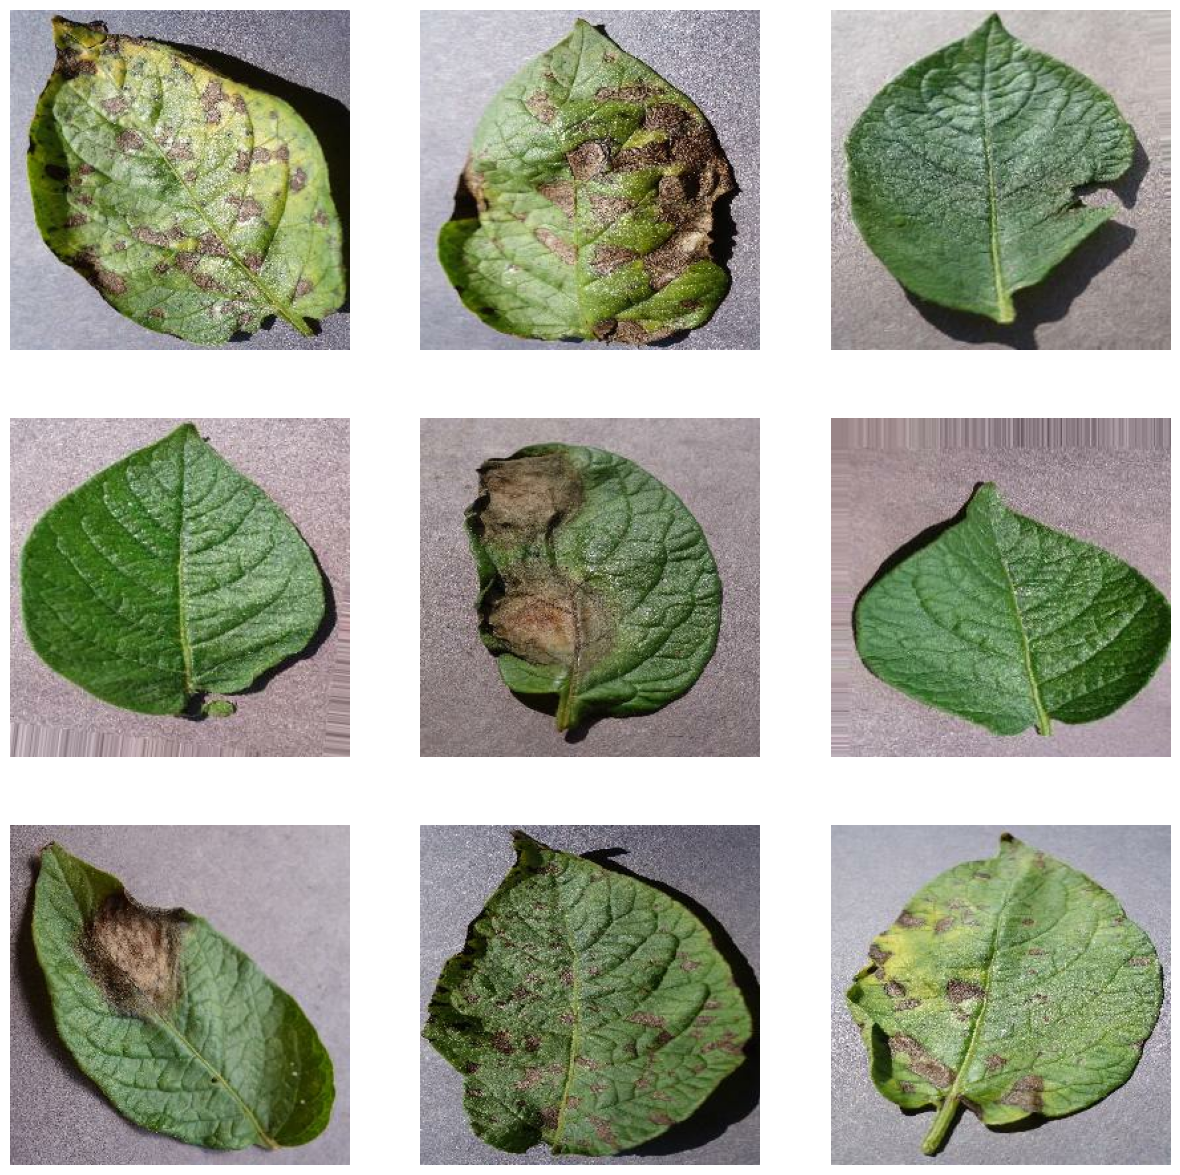

In [161]:
plt.figure(figsize=(15,15))
for image_batch,labels_batch in test_dataset.take(1):
    for i in range(9):
        
        ax=plt.subplot(3,3,i+1)
        
        first_image = image_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
    
        print("first image to predict")
        plt.imshow(first_image)
    
        print("actual label : " , class_names[first_label])
    
        batch_prediction = model.predict(image_batch)
        print(batch_prediction[i])
    
        print(f"predicted label is : {class_names[np.argmax(batch_prediction[i])]}")
        
        plt.axis('off')

In [162]:
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: d:\web dev backup\pyTensorflow


In [171]:
# model_version = 1
# model.save(f"./models/potato_disease_model/{model_version}.keras")
